# Energy Efficiency

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df=pd.read_excel('ENB2012_data.xlsx')
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
df.columns=['Relative Compactness',
            'Surface Area',
            'Wall Area',
            'Roof Area',
            'Overall Height',
            'Orientation',
            'Glazing Area',
            'Glazing Area Distribution',
            'Heating Load',
            'Cooling Load']

In [34]:
data=df.iloc[:,0:8]
target=df.iloc[:,8]

In [35]:
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [36]:
target

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating Load, Length: 768, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test , y_train, y_test = train_test_split(data,target,random_state=42)


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()

In [76]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-0.01778618, -0.13804433,  2.28746313, ..., -0.46644695,
         0.10079722, -0.53588117],
       [-0.20750542,  0.13997502, -1.70692896, ..., -0.46644695,
        -1.02292917, -1.1816292 ],
       [ 0.26679269, -0.41606368,  0.5755808 , ..., -1.37107134,
         0.10079722, -0.53588117],
       ...,
       [-0.49208429,  0.41799437, -1.13630152, ...,  0.43817744,
        -1.02292917,  1.4013629 ],
       [ 2.06912551, -1.80616042, -0.56567408, ...,  1.34280183,
         0.10079722,  0.75561488],
       [ 1.31024853, -1.25012172,  0.00495336, ...,  0.43817744,
        -1.02292917, -0.53588117]], shape=(576, 8))

In [77]:
x_test=scaler.transform(x_test)
x_test

array([[-1.34582089,  1.53007176,  1.14620825, ..., -1.37107134,
         1.2245236 ,  0.10986685],
       [-0.9663824 ,  0.97403306,  0.00495336, ..., -1.37107134,
         0.10079722, -1.1816292 ],
       [ 2.06912551, -1.80616042, -0.56567408, ..., -1.37107134,
         1.2245236 ,  0.10986685],
       ...,
       [ 0.26679269, -0.41606368,  0.5755808 , ...,  0.43817744,
         1.2245236 , -0.53588117],
       [ 1.31024853, -1.25012172,  0.00495336, ...,  0.43817744,
        -1.7720801 , -1.82737723],
       [-0.9663824 ,  0.97403306,  0.00495336, ...,  1.34280183,
         1.2245236 , -0.53588117]], shape=(192, 8))

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
regression=LinearRegression()

In [80]:
regression.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [81]:
from sklearn.model_selection import cross_val_score


In [88]:
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

np.float64(-8.559002819442506)

In [87]:
x_predict=regression.predict(x_test)

In [84]:
y_test

668    16.47
324    13.17
624    32.82
690    41.32
473    16.69
       ...  
554    14.50
319    12.63
594    42.74
6      20.71
615    15.30
Name: Heating Load, Length: 192, dtype: float64

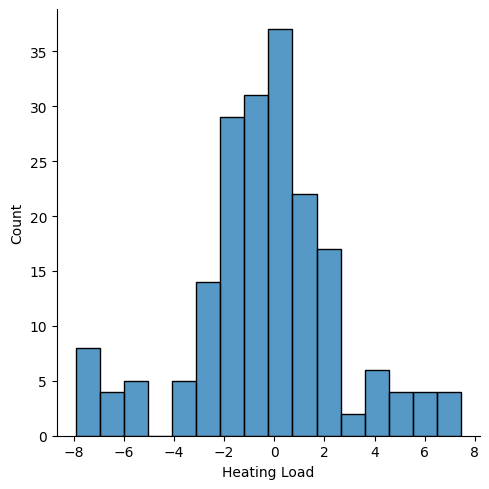

In [85]:
sns.displot(x_predict-y_test)